# __Iris Flowers Project__
---

## Import libraries and packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load the data

In [3]:
#Load the dataset from sklearn
iris = datasets.load_iris()

print('Keys of Iris dataset: ',iris.keys())

#Description of the dataset
print(iris['DESCR'])

Keys of Iris dataset:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)


## Summarize the dataset


In [4]:
print("Feature names corresponding to the data: \n{}\n".format(iris['feature_names']))
iris_X = iris['data'] #data
print(iris_X) 


Feature names corresponding to the data: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]


In [5]:
print('There are 3 flower classes for 3 respective labels: \n{}\n'.format(iris['target_names']))
iris_y = iris['target'] #labels
print(iris_y)

There are 3 flower classes for 3 respective labels: 
['setosa' 'versicolor' 'virginica']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#Dimensions of the data and labels
print('Shape of data: ',iris['data'].shape)
print('Shape of labels: ',iris['target'].shape)


Shape of data:  (150, 4)
Shape of labels:  (150,)


## Data Visualization


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


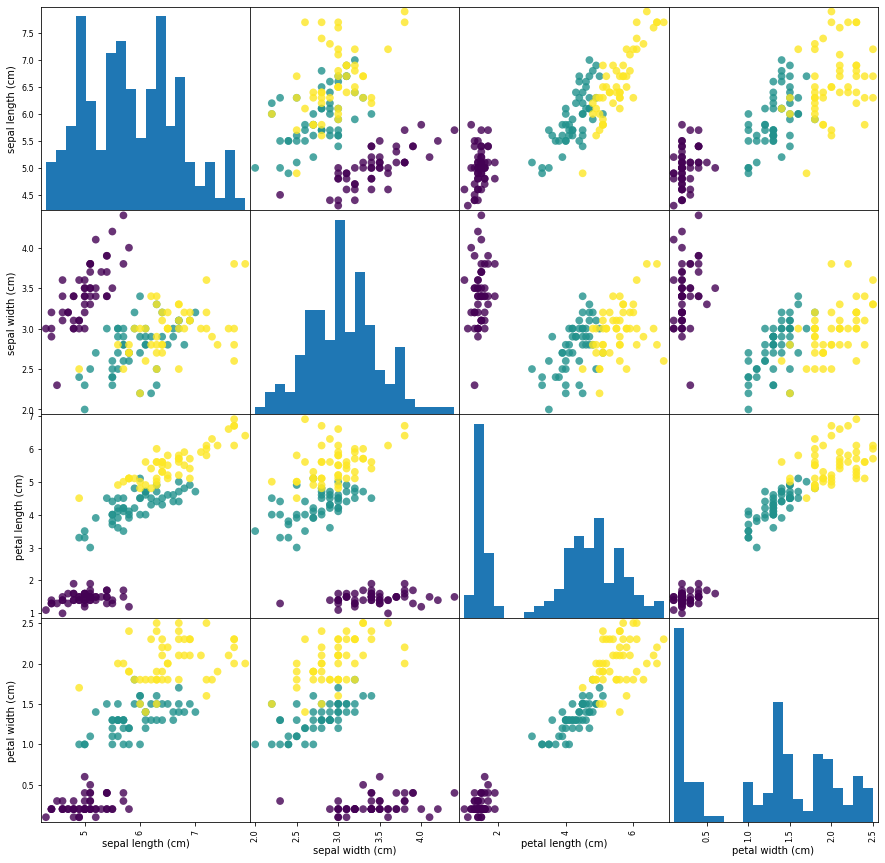

In [8]:
#Create dataframe from data in iris_X and label the columns using the feature names
iris_df = pd.DataFrame(iris_X, columns=iris['feature_names'])
print(iris_df)

#Create a scatter matrix from the dataframe, colored by iris_X
fig = pd.plotting.scatter_matrix(iris_df, c = iris_y, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

From the plots, we can easily find that the three classes of Iris flowers seem to be relatively separated using the sepal and petal measurements. It means that a machine learning model will be able to learn to classify them.

## Evaluating some algorithms


### Create a training set and a validation set

We will split the loaded dataset into two parts, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold out as a validation set to test if our models are good or not.

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=1)

### Building our models

#### We will use some simple linear (LR and LDA) and nonlinear (KNN, CART, NB and SVM) algorithms.

In [10]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluating every models using 10 fold cross validation to estimate accuracy
names = []
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
    results.append(cv_results)
    names.append(name)
    print("{}: {} ({})".format(name,cv_results.mean(),cv_results.std()))

LR: 0.9333333333333333 (0.08975274678557507)
LDA: 0.975 (0.03818813079129868)
KNN: 0.9583333333333333 (0.041666666666666685)
CART: 0.9416666666666667 (0.07500000000000001)
NB: 0.9499999999999998 (0.04082482904638632)
SVM: 0.9833333333333332 (0.03333333333333335)


### Select the best model

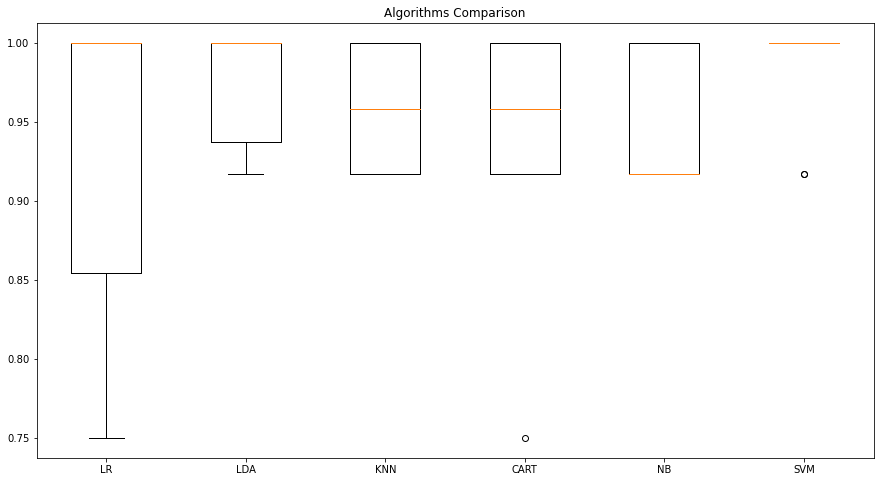

In [11]:
#Compare algorithms using boxplots
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names)
plt.title('Algorithms Comparison')
plt.show()

As we can see in the figure, **SVM** is the most accurate model. We will use it as our final model.

### Make Prediction

In [19]:
#Make prediction on test set
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [23]:
#Evaluating the algorithm
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Conclusion

Overall, all the ML algorithms which have been used seem to perform well on this dataset. SVM is the most accurate model with the accuracy of 96% on the test set.

While the confusion matrix provides an indication of the errors made.

Finally, the classification report shows a breakdown of each class by precision, recall, f1-score and support providing excellent results (granted the test set was small).


# __*Thanks for your attention !*__

---